k - Nearest Neighbors

- k개의 인접한 데이터 중 더 많은 데이터의 클래스를 따라가

- k값 : 동점을 막기 위해 보통 홀수로 선정함

1. k가 작으면 이상치 등 노이즈에 민감하게 반응하여 과대적합
    - k=1인 경우 가장 가까운 이웃과 같은 클래스

2. k가 크면 자료의 패턴을 파악할 수 없어 과소적합
    - k=N(전체 데이터 수)인 경우 평균의 개념이 됨

# KNN

K-최근접 이웃 알고리즘

1. 학습 데이터에게 각각 인덱스를 부여함 (1, 2, 3, 4, 5...)
2. 학습 데이터를 학습한 후에 들어오는 테스트 데이터와 모든 훈련 데이터 간의 거리를 계산함
3. 테스트 데이터와 가까운 순서대로 인덱스를 정렬함 ex(5,2,3 ....)
4. 가장 가까운 K개의 데이터를 선택함
5. 다수결로 많이 선택된 클래스로 테스트 데이터 값을 분류하거나
6. 선택된 K개의 데이터들의 평균값을 예측 결과값으로 사용함

만약 K가 짝수로 설정된다면 동점 상황이 만들어질 수 있고, 그러면 훈련 데이터를 특정 하나의 값으로 분류하지 못하는 문제가 발생할 수 있음.
그래서 K 값은 홀수로 설정해주는 것이 일반적

In [42]:
import numpy as np

In [43]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [44]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

In [72]:
# 더하기로 리스트를 이어붙인 값을 넣어줌
# np.column_stack 으로 2차원 배열 생성
# column_stack은 튜플을 전달받아서 동작하는 함수임
# 리스트 두개를 담은 하나의 튜플로 넘겨줌 -> 괄호 2개 사용한 이유
fish_data = np.column_stack((bream_length+smelt_length, bream_weight+smelt_weight))

In [73]:
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [74]:
# 도미 : 1 / 빙어 : 0
# 도미가 35마리
# np.ones로 길이가 35인 배열 생성해서 1로 채움
# 빙어가 14마리
# np.zeros로 길이가 14인 배열 생성해서 0으로 채움
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [75]:
import matplotlib.pylab as plt

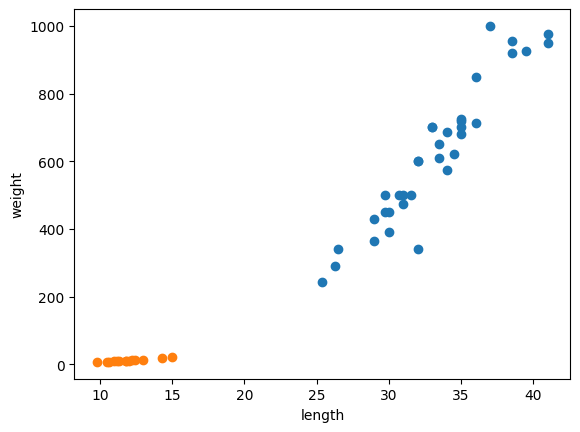

In [76]:
# x축은 도미의 길이, y축은 도미의 무게로 설정해서 산점도로 표현함
plt.scatter(bream_length, bream_weight)
# x축은 빙어의 길이, y축은 빙어의 무게로 설정해서 산점도로 표현함
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 이렇게 표현헤서 도미와 빙어가 어떻게 구분돼서 분포되는지 시각화로 확인함

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# 전체 데이터 중 70%는 훈련용 데이터, 30%는 테스트용 데이터로 분할함
x_train, x_test, y_train, y_test = train_test_split(fish_data, fish_target, test_size=0.3, random_state=1)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
# model을 k 최근접 이웃 알고리즘 객체로 생성함
model = KNeighborsClassifier()

In [ ]:
# 모델 훈련시킴
model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [82]:
# 모델의 정확도 확인
# (모델이 x_test 값을 보고 y값을 예측한 뒤에 실제 정답값인 y_test 값과 모델의 예측값을 비교함.)
model.score(x_test, y_test)

1.0

In [83]:
# 길이가 20, 무게 150인 물고기는???
print(model.predict([[20, 150]]))

[0.]


In [84]:
# dist 는 거리
# idx 는 인덱스
dist, idx = model.kneighbors([[20, 150]])
# KNN에서 k의 기본값은 5인데 아무것도 설정해주지않아서 기본값 5로 설정됨

# 거리순으로 정렬됐을때 상위 5개 훈련 데이터와 테스트 데이터의 거리 출력됨
print(dist)

# 거리순으로 정렬됐을때 상위 5개 훈련 데이터와 테스트 데이터가 부여받았던 인덱스 출력됨
print(idx)

[[ 92.158342   130.42461424 137.97767935 138.02057818 140.14167831]]
[[25 15 22  7 23]]


In [ ]:
# 출력받은 인덱스를 넣어서
# 이웃 데이터들을 조회해보기

# 이웃 데이터의 인덱스로
# 길이, 무게 확인
print(x_train[idx])

# 도미인지 빙어인지 판단된 값 확인
print(y_train[idx])

[[[ 25.4 242. ]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]
  [ 26.3 290. ]]]
[[1. 0. 0. 0. 1.]]


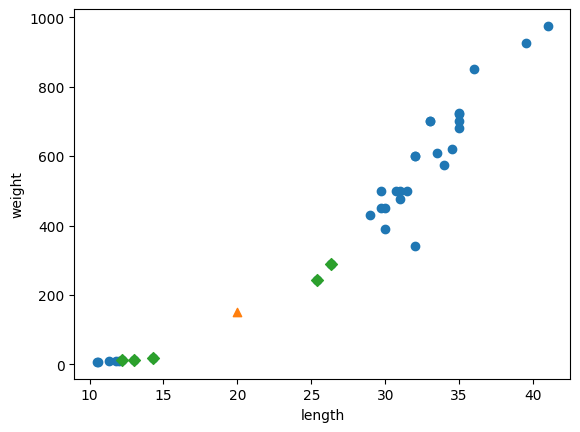

In [85]:
# 모든 행의 첫번째열 (길이)
# 모든 행의 두번째열 (무게)
plt.scatter(x_train[:, 0], x_train[:, 1])

# 삼각형 마커
plt.scatter(20, 150, marker="^")

# 다이아몬트 마커
# 길이, 무게 좌표
plt.scatter(x_train[idx, 0], x_train[idx,1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")

# 시각화
plt.show()